# Load the data:

In [1]:
import numpy as np
import os
import pandas as pd
Stft_folder = "D:\Swarming Project buzz 2\Features Extracted Data\STFT_Features"

Noneswarming_train = np.load(os.path.join(Stft_folder, 'Train', 'Noneswarming_train.npy'))
Swarming_train = np.load(os.path.join(Stft_folder, 'Train', 'Swarming_train.npy'))

Noneswarming_test = np.load(os.path.join(Stft_folder, 'Test', 'Noneswarming_test.npy'))
Swarming_test = np.load(os.path.join(Stft_folder, 'Test', 'Swarming_test.npy'))

Noneswarming_val = np.load(os.path.join(Stft_folder, 'Val', 'Noneswarming_val.npy'))
Swarming_val = np.load(os.path.join(Stft_folder, 'Val', 'Swarming_val.npy'))

C:\Users\hoang\AppData\Local\Temp\ipykernel_22808\421169917.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load the data into Pandas DataFrames

In [2]:
Noneswarming_train_df = pd.DataFrame(np.load(os.path.join(Stft_folder, 'Train', 'Noneswarming_train.npy')))
Swarming_train_df = pd.DataFrame(np.load(os.path.join(Stft_folder, 'Train', 'Swarming_train.npy')))

Noneswarming_test_df = pd.DataFrame(np.load(os.path.join(Stft_folder, 'Test', 'Noneswarming_test.npy')))
Swarming_test_df = pd.DataFrame(np.load(os.path.join(Stft_folder, 'Test', 'Swarming_test.npy')))

Noneswarming_val_df = pd.DataFrame(np.load(os.path.join(Stft_folder, 'Val', 'Noneswarming_val.npy')))
Swarming_val_df = pd.DataFrame(np.load(os.path.join(Stft_folder, 'Val', 'Swarming_val.npy')))

# Concatenate the data along with labels

In [3]:
X_train = pd.concat([Noneswarming_train_df, Swarming_train_df], ignore_index=True)
X_test = pd.concat([Noneswarming_test_df, Swarming_test_df], ignore_index=True)
X_val = pd.concat([Noneswarming_val_df, Swarming_val_df], ignore_index=True)

In [4]:
# Create labels
y_train = pd.Series([0] * Noneswarming_train_df.shape[0] + [1] * Swarming_train_df.shape[0], name='label')
y_test = pd.Series([0] * Noneswarming_test_df.shape[0] + [1] * Swarming_test_df.shape[0], name='label')
y_val = pd.Series([0] * Noneswarming_val_df.shape[0] + [1] * Swarming_val_df.shape[0], name='label')

In [5]:
# Importing necessary libraries.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Initialize the StandardScaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
X_train_scaled

array([[-0.28254735, -0.4999509 , -0.4959878 , ..., -0.40855506,
        -0.3969993 , -0.44631192],
       [-0.28771767, -0.5132977 , -0.5289547 , ..., -0.41054043,
        -0.41731805, -0.42611286],
       [-0.2414293 , -0.45635986, -0.47434202, ..., -0.22562215,
        -0.34714442, -0.4089194 ],
       ...,
       [-0.2860025 , -0.6115869 , -0.68241316, ..., -0.74740165,
        -0.75640374, -0.77531195],
       [-0.28844264, -0.61395204, -0.68612546, ..., -0.7458264 ,
        -0.7545091 , -0.7737559 ],
       [-0.2927333 , -0.6177921 , -0.6899413 , ..., -0.74912286,
        -0.7575853 , -0.77671653]], dtype=float32)

In [7]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
t1 = time.time()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
t2 = time.time()
print(f"time elapsed: {t2 - t1} seconds or {int((t2 - t1) // 60)} minutes and {int((t2 - t1) - (t2 - t1) // 60 * 60)} seconds")

Testing Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      5000
           1       0.78      1.00      0.88      6575

    accuracy                           0.84     11575
   macro avg       0.89      0.82      0.83     11575
weighted avg       0.88      0.84      0.84     11575

time elapsed: 76.84081435203552 seconds or 1 minutes and 16 seconds


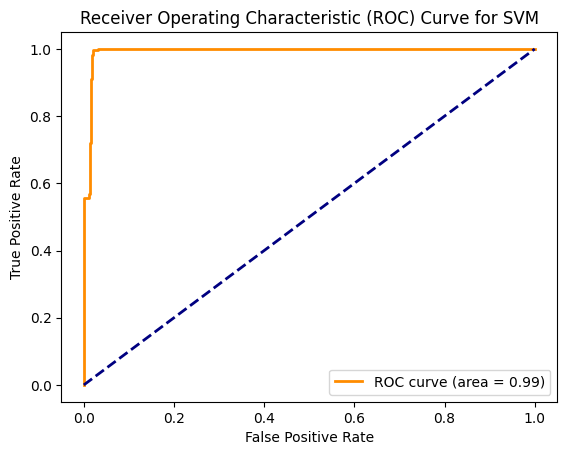

In [8]:
# Make predictions on the test set
y_test_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")

# Save the plot as an image file (e.g., PNG)
plt.savefig('ROC of SVM (1024 STFT features).png')

# Display the plot
plt.show()


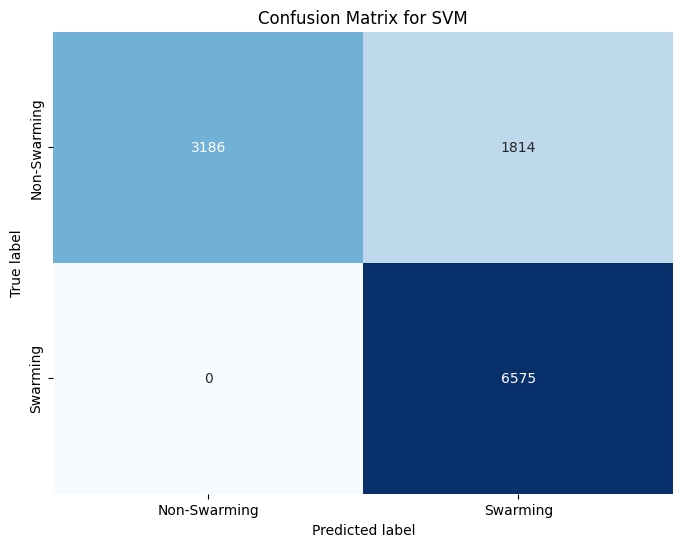

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the test set
y_test_pred = svm_model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Swarming', 'Swarming'],
            yticklabels=['Non-Swarming', 'Swarming'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM')
plt.savefig('Confusion Matrix of SVM (1024 STFT features).png')
plt.show()
